In [115]:
#Base de dados: Covid19br (https://github.com/wcota/covid19br/)

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as npy
from numpy.random import rand



def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.2f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])

covid_dataset_cities = pd.read_csv('c:\\Users\\gbdfigu\\Desktop\\Ada_Project_Avancado\\dataset\\cases-brazil-cities.csv')
covid_dataset_state = pd.read_csv('c:\\Users\\gbdfigu\\Desktop\\Ada_Project_Avancado\\dataset\\cases-brazil-states.csv')
covid_dataset_total = pd.read_csv('c:\\Users\\gbdfigu\\Desktop\\Ada_Project_Avancado\\dataset\\cases-brazil-total.csv')
covid_dataset_time_total = pd.read_csv('c:\\Users\\gbdfigu\\Desktop\\Ada_Project_Avancado\\dataset\\cases-brazil-cities-time_changesOnly.csv')

In [117]:
covid_dataset_clean = covid_dataset_time_total[covid_dataset_time_total['state'] != 'TOTAL']
#covid_dataset_clean = covid_dataset_time_total[covid_dataset_time_total['state'] == 'SP']
covid_dataset_clean = covid_dataset_clean[covid_dataset_clean['city'] != 'CASO SEM LOCALIZAÇÃO DEFINIDA']
pattern = 'CASO SEM LOCALIZAÇÃO DEFINIDA.*'
covid_dataset_clean = covid_dataset_clean[~covid_dataset_clean['city'].str.contains(pattern)]
covid_dataset_cities = covid_dataset_cities.drop(columns=['ibgeID', 'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants', 'deaths_by_totalCases', '_source', 'date', 'newCases', 'newDeaths', 'last_info_date'])


In [118]:
max = covid_dataset_cities['totalCases'].max()
covid_dataset_cities[covid_dataset_cities['totalCases'] == max]

,country,state,city,deaths,totalCases
4225,Brazil,RJ,Rio de Janeiro/RJ,38144,1316242


In [119]:
covid_dataset_cities = covid_dataset_cities.groupby(['state','country'], as_index=False).sum()

C:\Users\gbdfigu\AppData\Local\Temp\ipykernel_17016\2164500037.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xlabels)


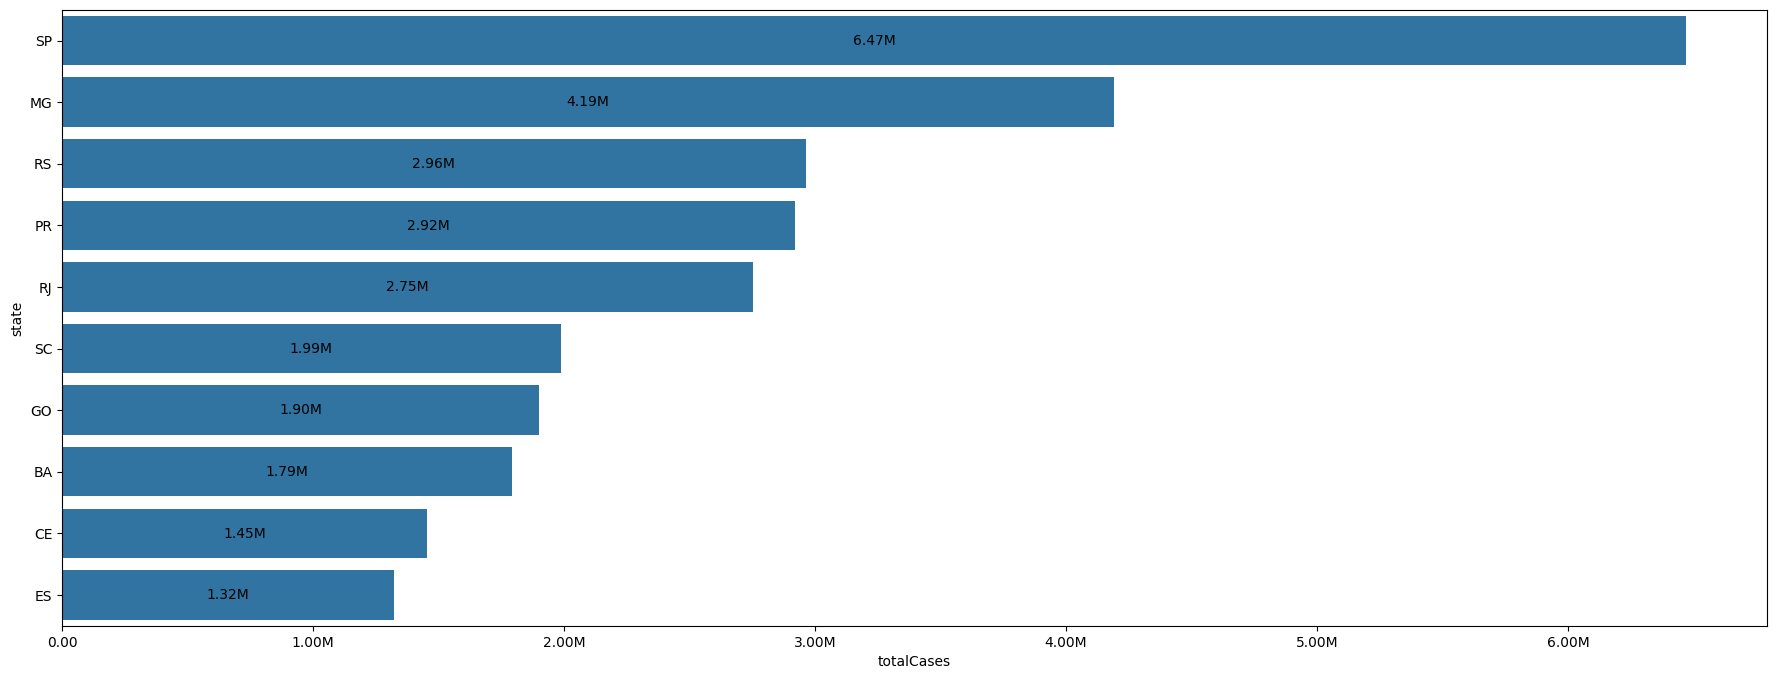

In [194]:
top_10_states_cases = covid_dataset_cities.nlargest(n=10, columns=['totalCases']).drop(columns=['city'])
fig = plt.figure(figsize=(22,8))
ax = sns.barplot(x='totalCases', y='state', data=top_10_states_cases, orient='h')
xlabels = [human_format(x) for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
ax.bar_label(ax.containers[0], label_type="center", labels=[f'{human_format(x.get_width())}' for x in ax.containers[0]])
plt.show()

In [121]:
covid_dataset_clean = covid_dataset_clean[['state', 'newCases', 'date']]
covid_dataset_clean['date'] = pd.to_datetime(covid_dataset_clean['date'], format='ISO8601')
covid_dataset_clean['ano'] = covid_dataset_clean['date'].dt.year.astype(str)
covid_dataset_clean = covid_dataset_clean[covid_dataset_clean['ano'] == '2022']
covid_dataset_clean['mes_ano'] = covid_dataset_clean['date'].dt.strftime('%b-%Y')
covid_dataset_clean = covid_dataset_clean[['newCases','mes_ano']].groupby(['mes_ano'], as_index=False).sum()
covid_dataset_clean['mes_ano'] = covid_dataset_clean['mes_ano'].astype(str)

In [122]:
covid_dataset_clean['mes_ano'] = pd.to_datetime(covid_dataset_clean['mes_ano'])
covid_dataset_clean.sort_values(by='mes_ano', inplace = True)
#covid_dataset_clean['mes_ano'] = pd.to_datetime(covid_dataset_clean['mes_ano'].astype(str), format='%Y%m')
covid_dataset_clean['mes_ano'] = covid_dataset_clean['mes_ano'].dt.strftime('%b-%Y')
covid_dataset_clean['mes_ano'] = covid_dataset_clean['mes_ano'].astype(str)

C:\Users\gbdfigu\AppData\Local\Temp\ipykernel_17016\2903296224.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  covid_dataset_clean['mes_ano'] = pd.to_datetime(covid_dataset_clean['mes_ano'])


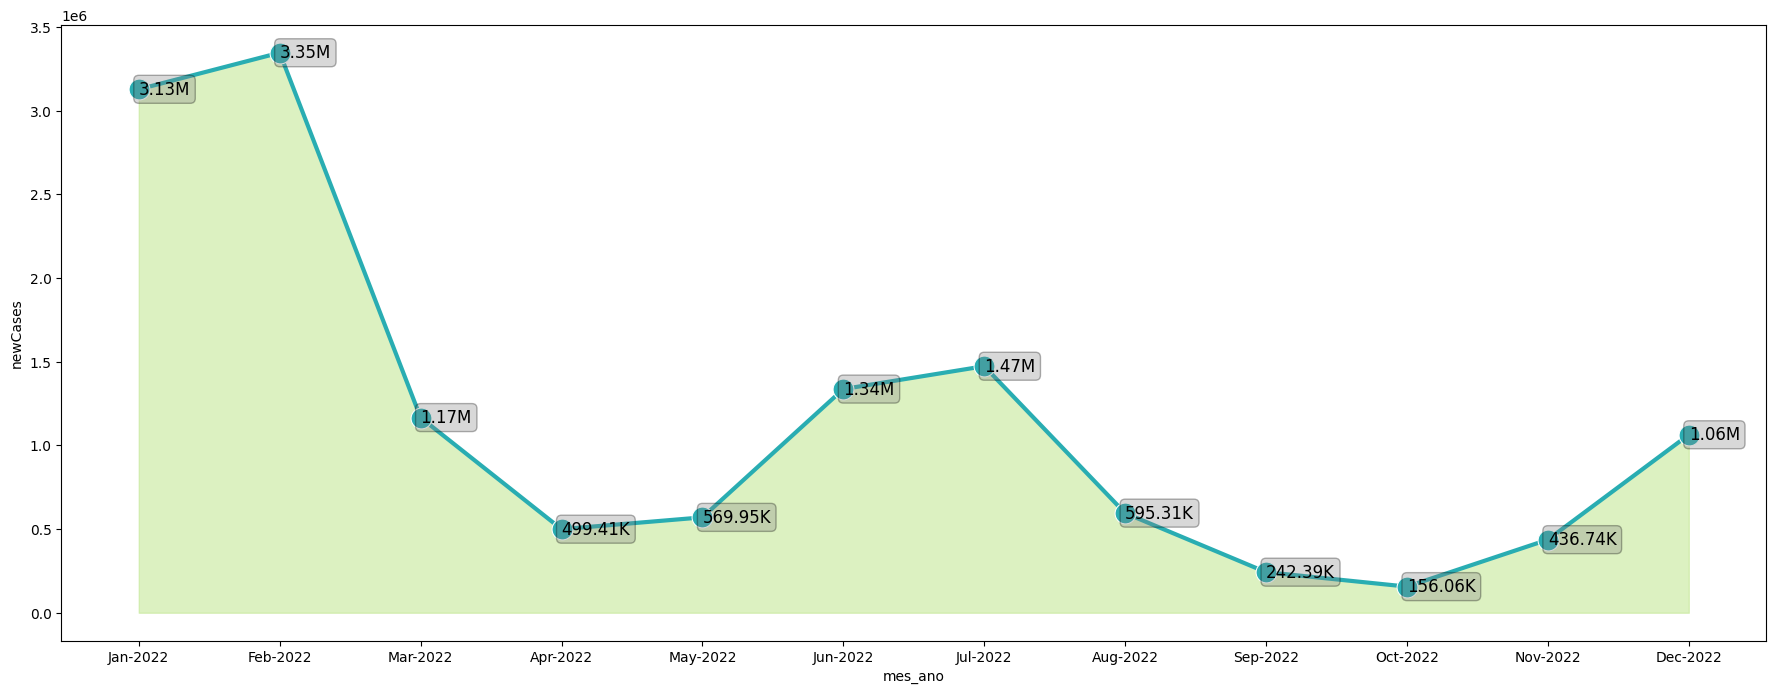

In [144]:
fig = plt.figure(figsize=(22,8))

sns.lineplot(data=covid_dataset_clean, x='mes_ano', y='newCases', marker='o', linewidth = 3, markersize=15, color='#29ADB2')
plt.fill_between(covid_dataset_clean['mes_ano'], covid_dataset_clean['newCases'], color='#C5E898', alpha=0.6)

for x, y in zip(covid_dataset_clean['mes_ano'], covid_dataset_clean['newCases']):
    plt.text(x = x, y = y-150, s = human_format(y), fontsize=12, color = 'black', ha='left', va='center',
             bbox=dict(facecolor='grey', boxstyle='round', alpha=0.3))

plt.show()
